# MAP565 Project on time series

## Study of Copulas

In [46]:
import pandas as pd
import utils.functions as f
from datetime import datetime
from copulas.multivariate import GaussianMultivariate
import matplotlib.pyplot as plt

START_DATE = datetime(2021, 1, 1) 
END_DATE = datetime(2023, 4, 1)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
All data downloaded : True


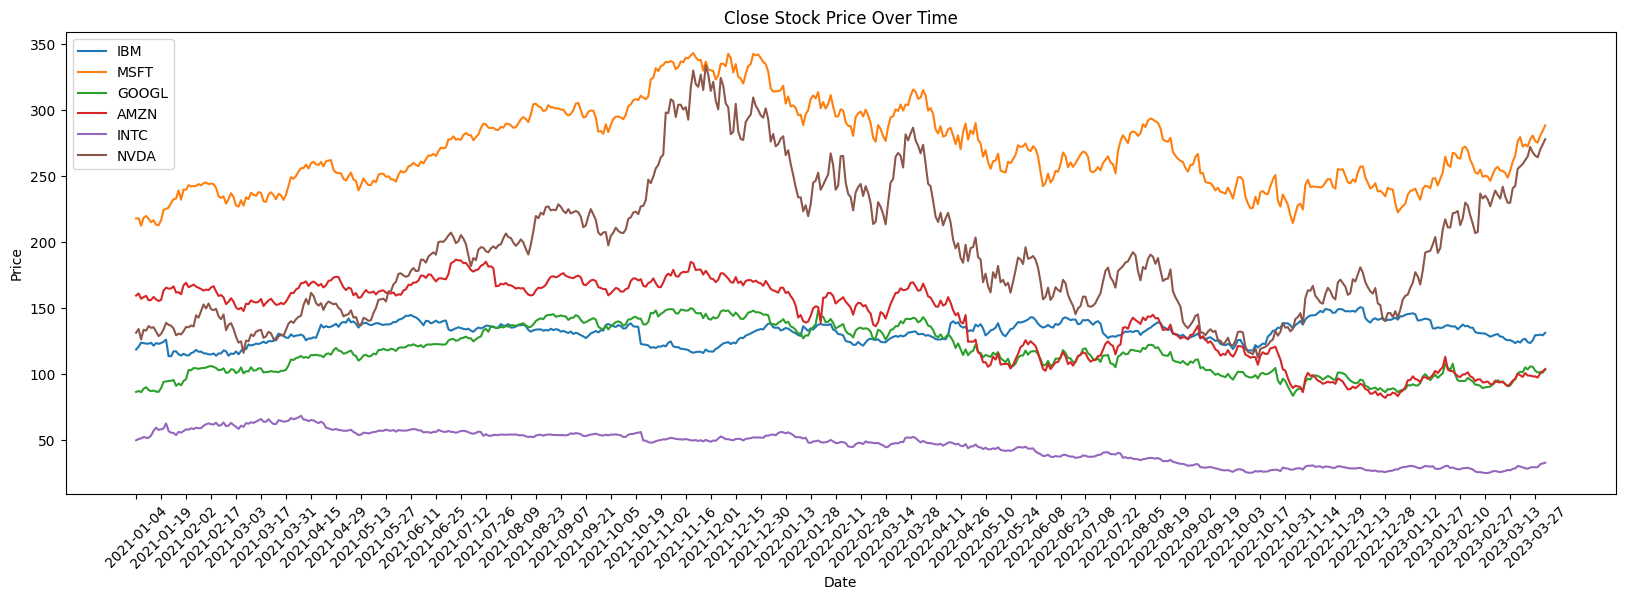

In [47]:
leaders_quantum_computing = ['IBM', 'MSFT', 'GOOGL', 'AMZN', 'INTC', 'TSLA', 'AAPL', 'NVDA', 'QCOM', 'AMD', 'QBTS', 'IONQ', 'HON', 'FORM']
leaders_quantum_computing = ['IBM', 'MSFT', 'GOOGL', 'AMZN', 'INTC', 'NVDA']
dict_stock_data = {}
for stock in leaders_quantum_computing : 
    dict_stock_data[stock] = f.get_stock_data(stock, START_DATE, END_DATE)

print(f"All data downloaded : {dict_stock_data.__len__() == len(leaders_quantum_computing)}")
f.plot_multiple_stock_data(dict_stock_data)

In [48]:
# Concaténer les données dans un DataFrame unique
list_df = []
for key in dict_stock_data.keys():
    list_df.append(dict_stock_data[key]["close"])  
data = pd.concat(list_df, axis=1)
data.columns = dict_stock_data.keys()
data['date'] = dict_stock_data[leaders_quantum_computing[0]]['date']

# Supprimer les lignes contenant des valeurs manquantes
data = data.dropna()
data.head()


,IBM,MSFT,GOOGL,AMZN,INTC,NVDA,date
0,118.489487,217.690002,86.306503,159.331497,49.669998,131.134995,2021-01-04
1,120.592735,217.899994,87.002502,160.925507,50.610001,134.047501,2021-01-05
2,123.604210,212.250000,86.143997,156.919006,51.099998,126.144997,2021-01-06
3,123.317398,218.289993,88.717003,158.108002,52.189999,133.440002,2021-01-07
4,122.877632,219.619995,89.891502,159.134995,51.650002,132.767502,2021-01-08


## Gaussian copula

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encounte

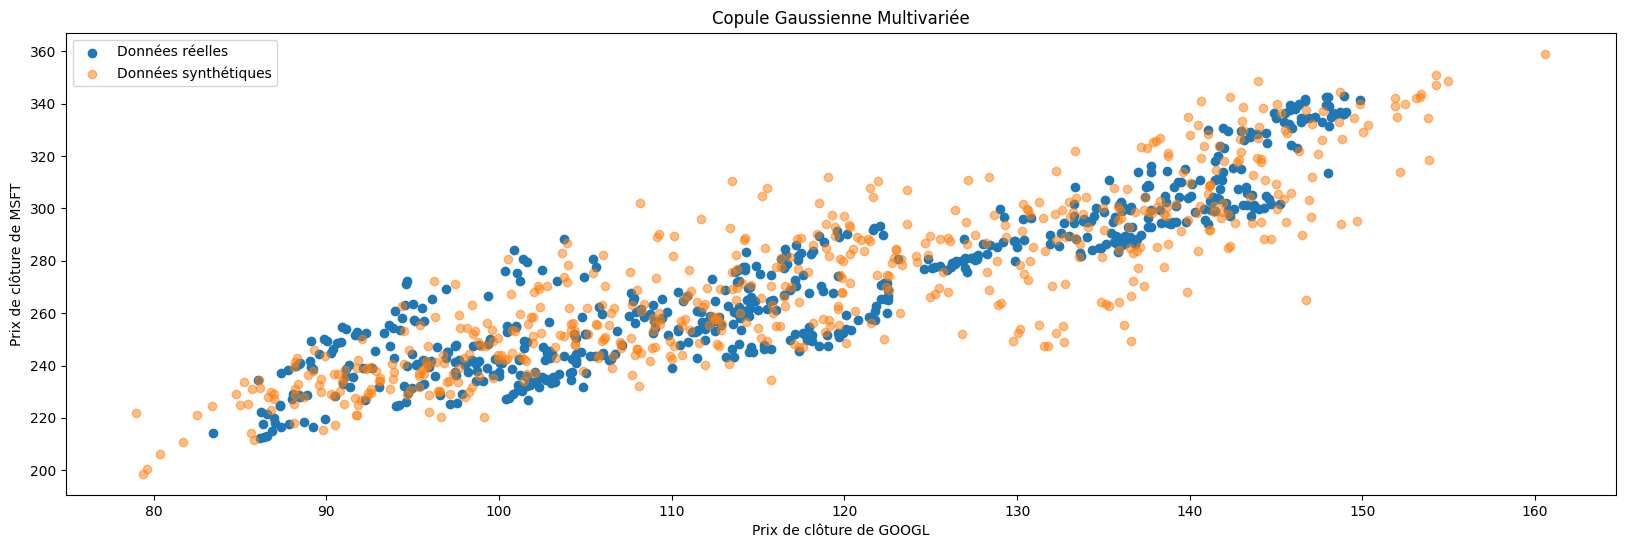

In [49]:
# Créer un modèle de copule gaussienne multivariée
copula = GaussianMultivariate()

# Ajuster le modèle de copule aux données
copula.fit(data[leaders_quantum_computing])

# Générer des échantillons synthétiques à partir du modèle
samples = copula.sample(len(data))

# Visualiser les données réelles et synthétiques pour une paire d'actifs
asset1 = 'GOOGL'
asset2 = 'MSFT'

plt.figure(figsize=(20, 6))
plt.scatter(data[asset1], data[asset2], label='Données réelles')
plt.scatter(samples[asset1], samples[asset2], label='Données synthétiques', alpha=0.5)
plt.xlabel(f'Prix de clôture de {asset1}')
plt.ylabel(f'Prix de clôture de {asset2}')
plt.legend()
plt.title('Copule Gaussienne Multivariée')
plt.show()

In [62]:
from scipy import stats
# normality test
stats.normaltest(data[leaders_quantum_computing])


NormaltestResult(statistic=array([ 14.76411   ,  36.07137411, 504.41220401, 643.55666347,
       590.38367457,  39.53715087]), pvalue=array([6.22320703e-004, 1.46960504e-008, 2.93955504e-110, 1.79244621e-140,
       6.30687123e-129, 2.59786616e-009]))

On remarque que les p-values sont très faibles ce qui signifie que la copule gaussienne n'est pas pour autant très adapté à notre modèle, qui de plut fait intervenir des processus, il s'agirait donc de prendre en compte cette caractéristique de dépendance en t ainsi que la caractéristique d'information au temps t qui détermine la distribution suivante (normale dans le cas d'un mouvement brownien)

# MAP565 Project on time series

## Copulas associated with Brownian motion processes and their maxima

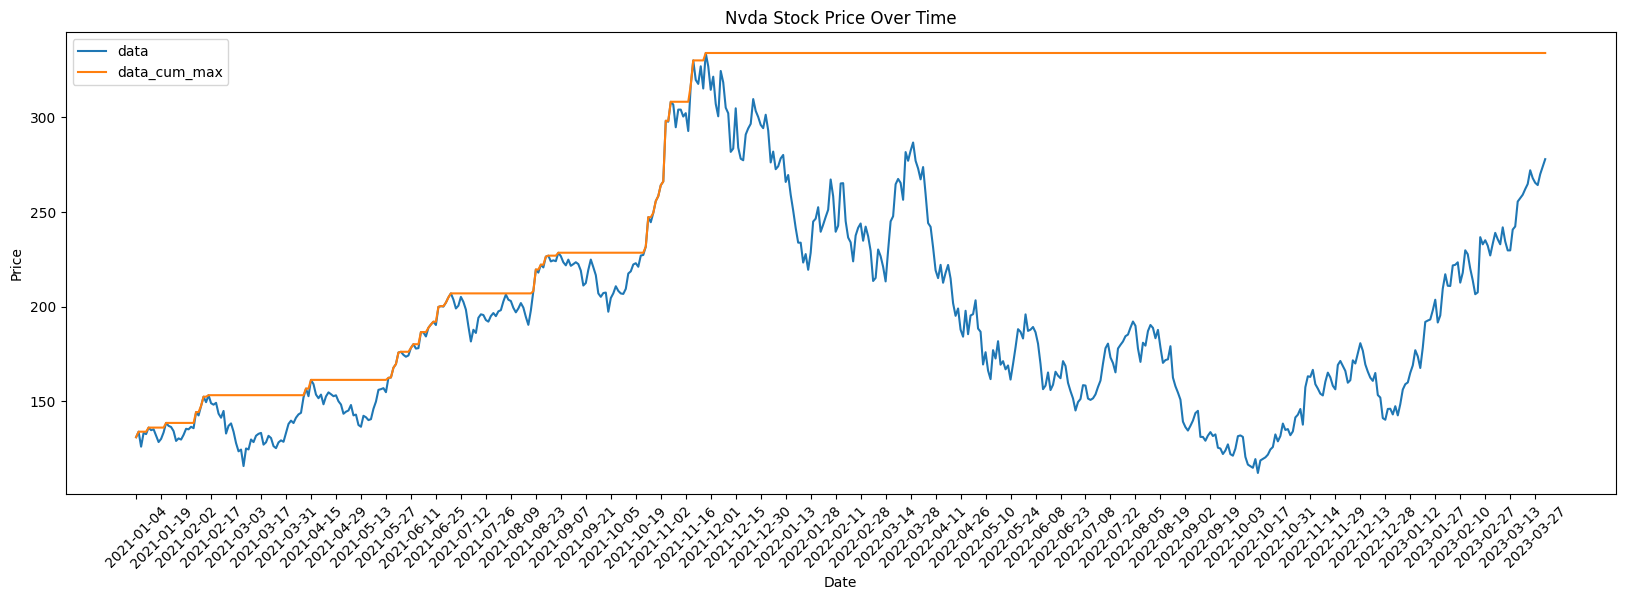

In [50]:
# make the cummulative maximum for each column
data_cum_max = data.cummax()
# plot the data
f.plot_multiple_stock_data({'data': data, 'data_cum_max': data_cum_max}, column = 'NVDA')

In [51]:
# copula between the data and the cummulative maximum
STOCK = 'NVDA'
data_and_data_max = pd.concat([data[STOCK], data_cum_max[STOCK]], axis=1)
data_and_data_max.columns = [f'{STOCK}_close', f'{STOCK}_close_cummax']
data_and_data_max.head()

,NVDA_close,NVDA_close_cummax
0,131.134995,131.134995
1,134.047501,134.047501
2,126.144997,134.047501
3,133.440002,134.047501
4,132.767502,134.047501


## Copulas on returns 

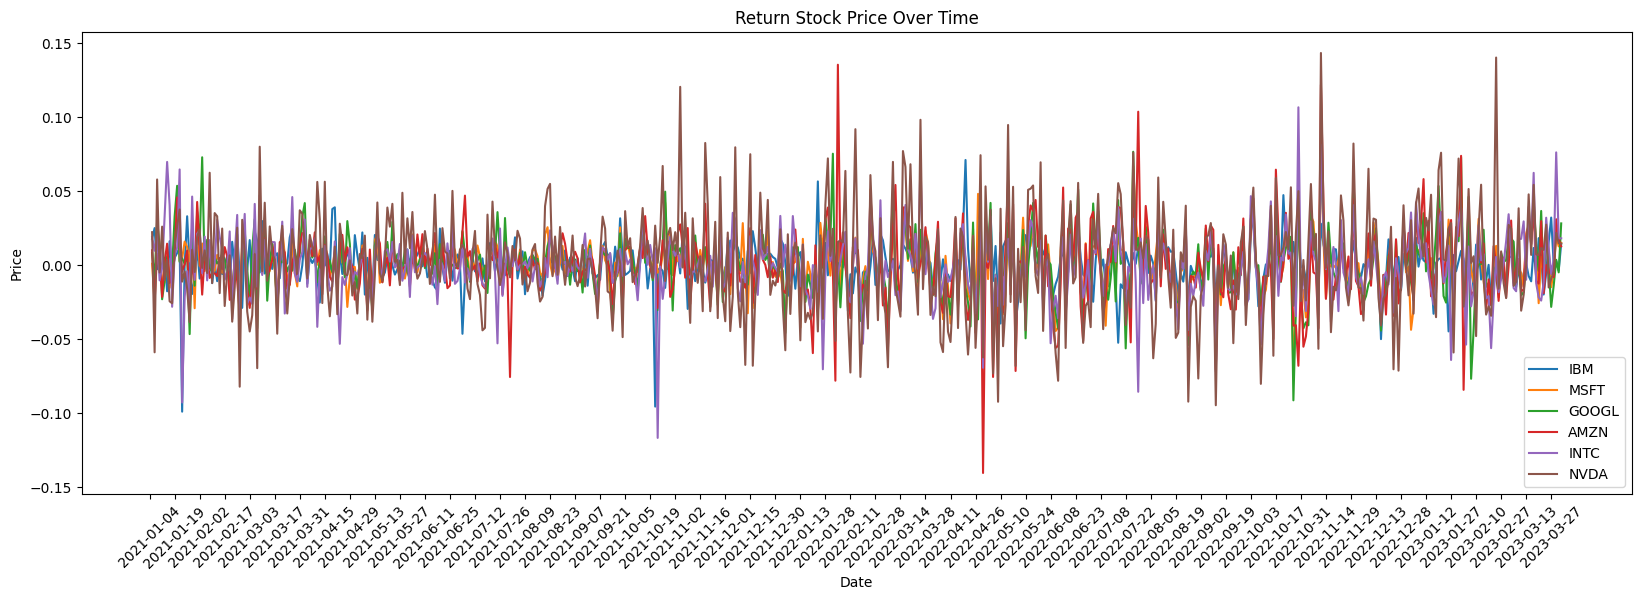

In [52]:
# 1. Compute the returns of the stocks
dict_stock_returns = {}
for stock in leaders_quantum_computing:
    dict_stock_returns[stock] = f.compute_stock_returns(dict_stock_data[stock])

# 2. Plot the returns of the stocks
f.plot_multiple_stock_data(dict_stock_returns, column='return')

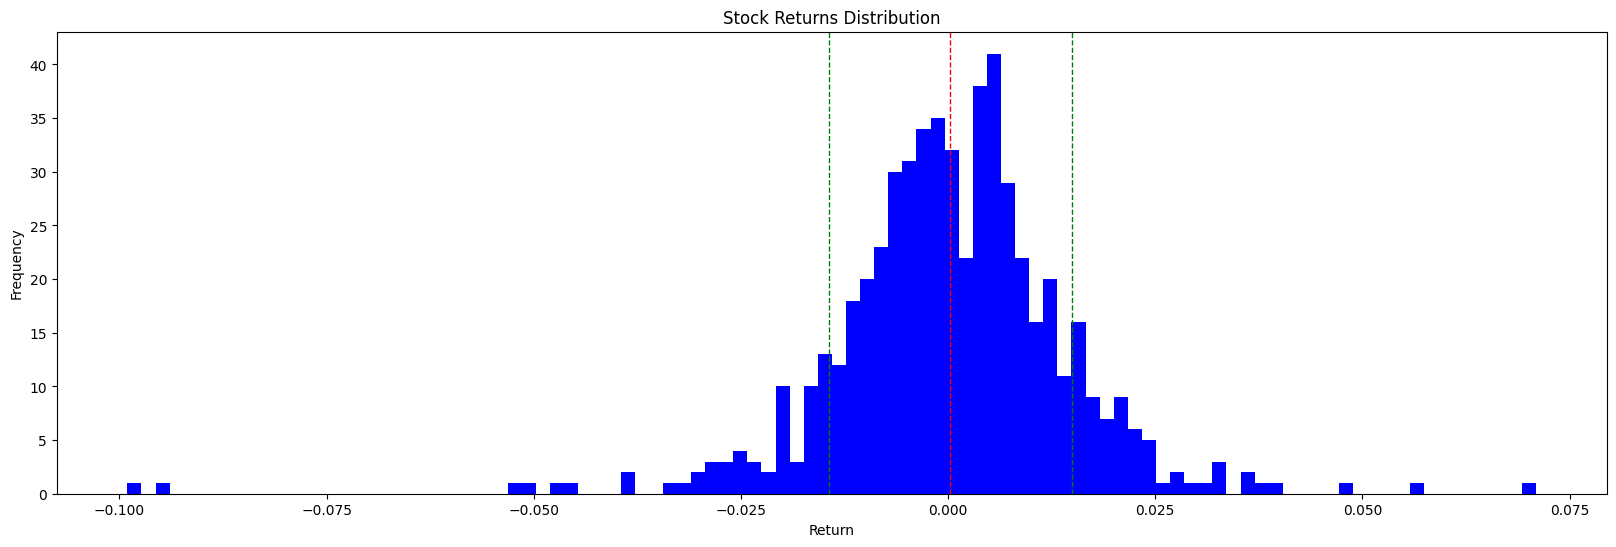

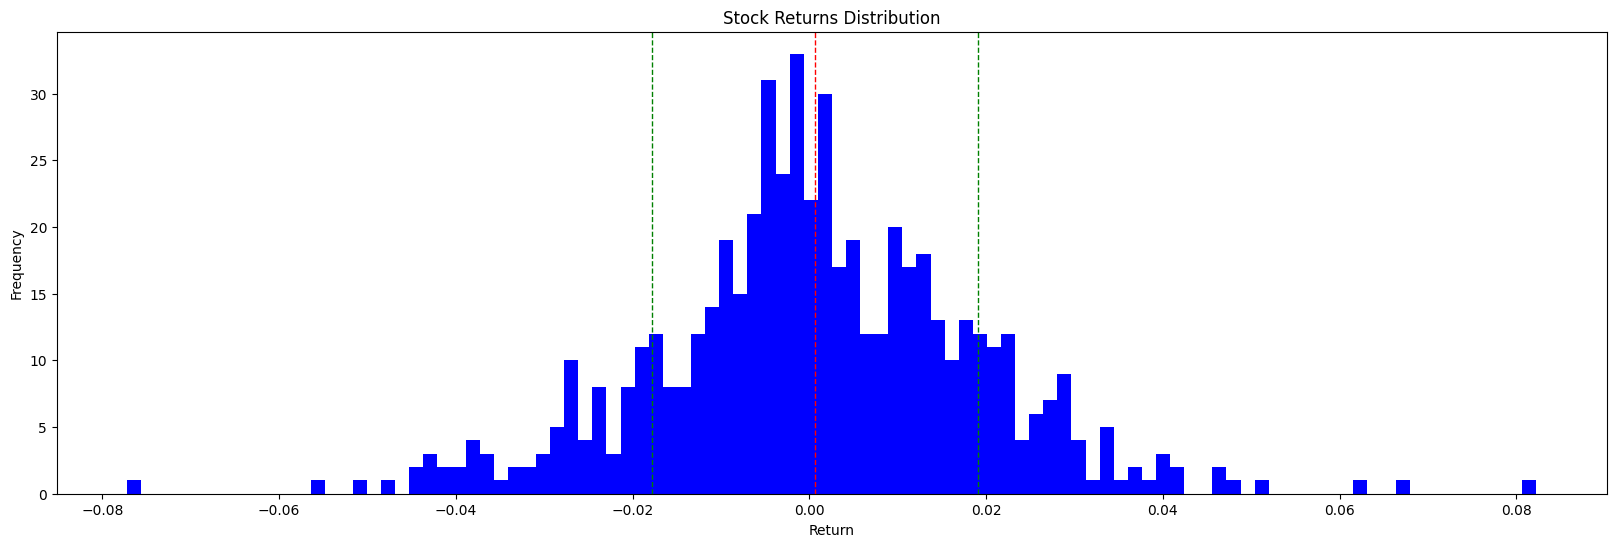

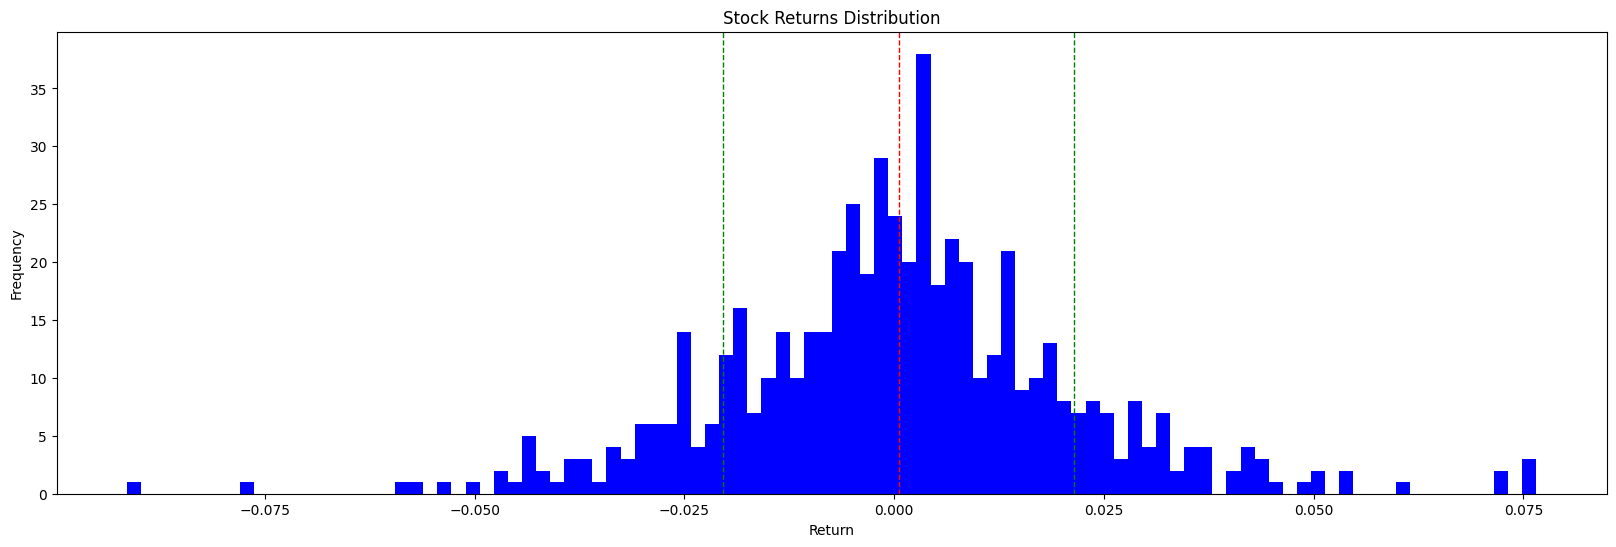

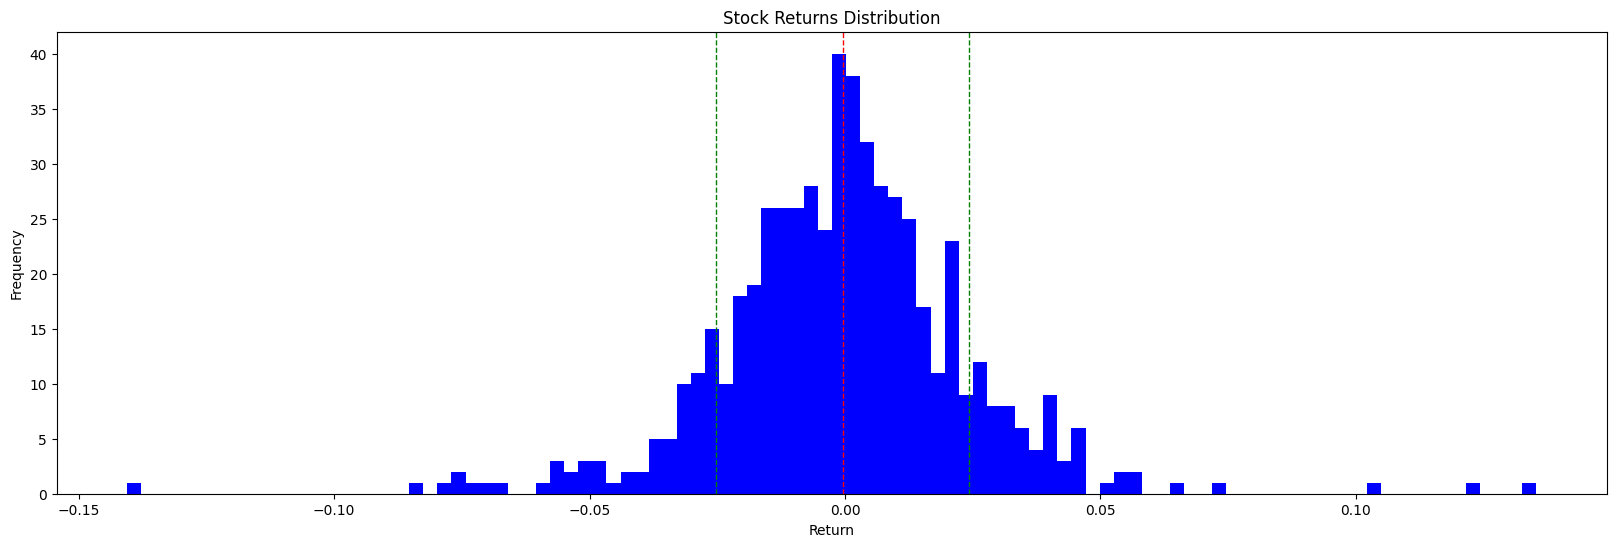

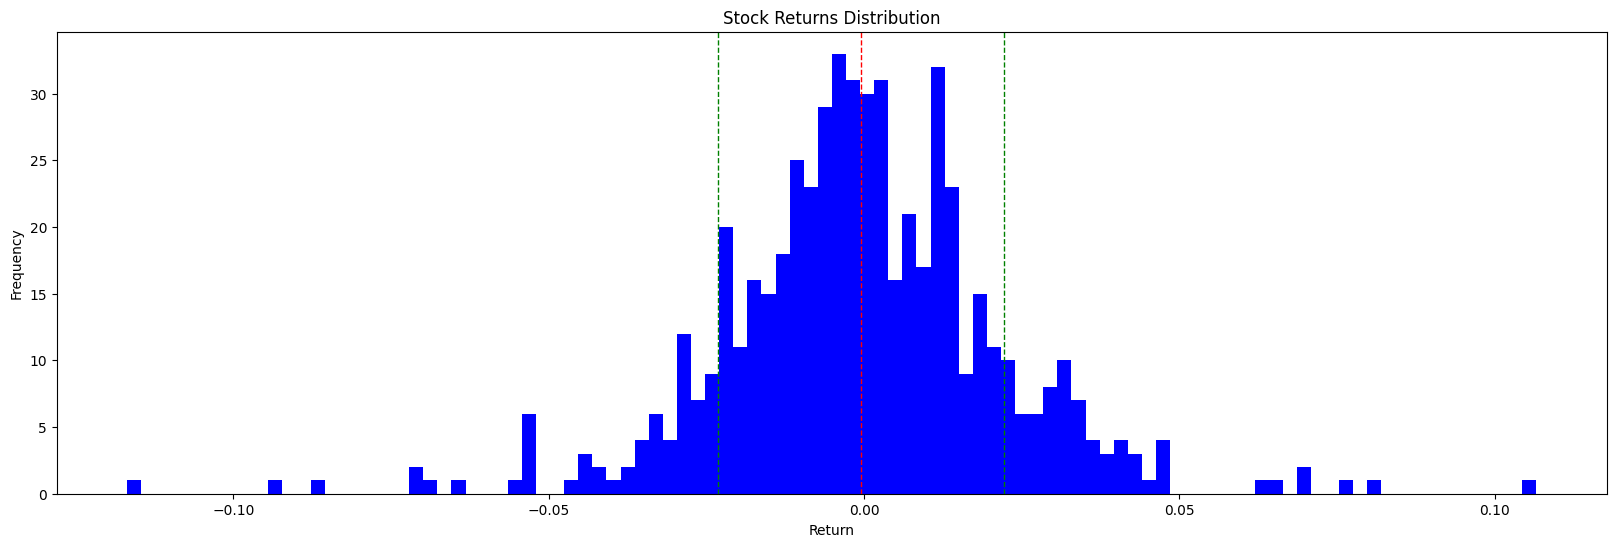

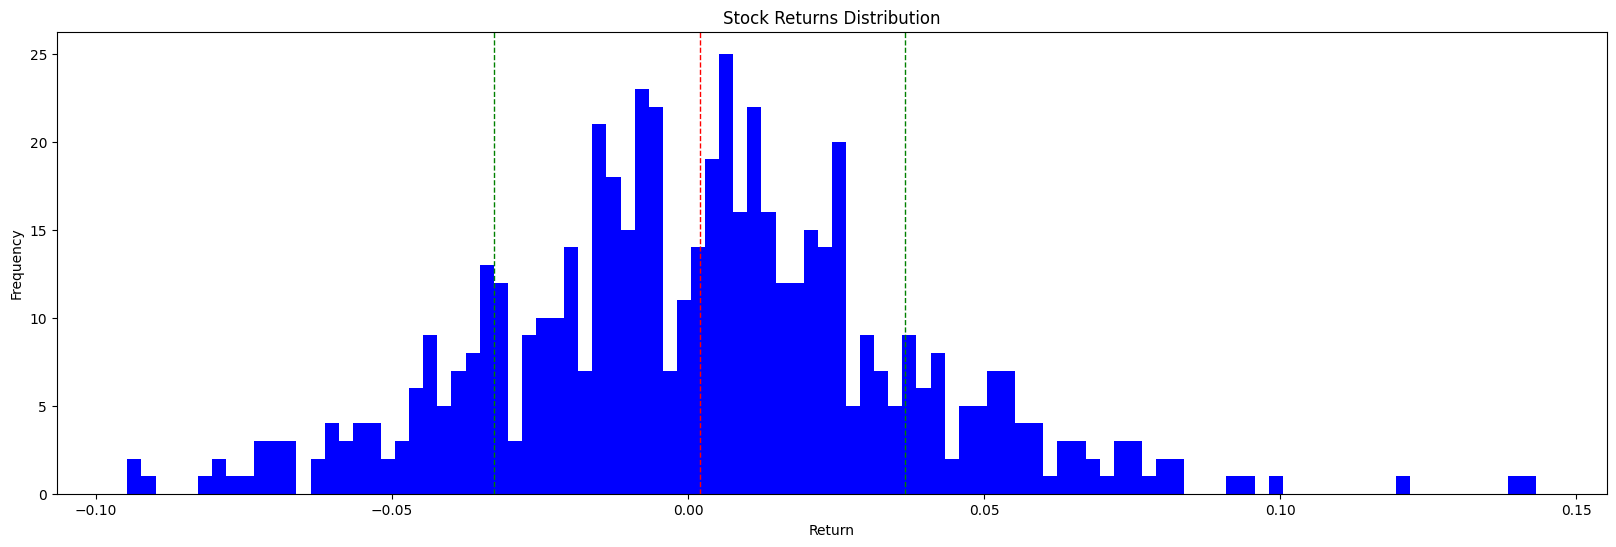

In [53]:
# plot distribution of returns
for stock in leaders_quantum_computing:
    f.plot_stock_returns_distribution(dict_stock_returns[stock])

In [54]:
## copulas on returns
# 1. Concatenate the returns in a single DataFrame
list_df = []
for key in dict_stock_returns.keys():
    list_df.append(dict_stock_returns[key]["return"])
returns = pd.concat(list_df, axis=1).dropna()
returns.columns = dict_stock_returns.keys()
returns.head()

,IBM,MSFT,GOOGL,AMZN,INTC,NVDA
1,0.017751,0.000965,0.008064,0.010004,0.018925,0.022210
2,0.024972,-0.025929,-0.009868,-0.024897,0.009682,-0.058953
3,-0.002320,0.028457,0.029869,0.007577,0.021331,0.057830
4,-0.003566,0.006093,0.013239,0.006496,-0.010347,-0.005040
5,0.000389,-0.009699,-0.023106,-0.021519,-0.002130,0.025966


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning:

invalid value encountered in sqrt

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning:

divide by zero encountered in divide

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning:

invalid value encountered in sqrt

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

/Li

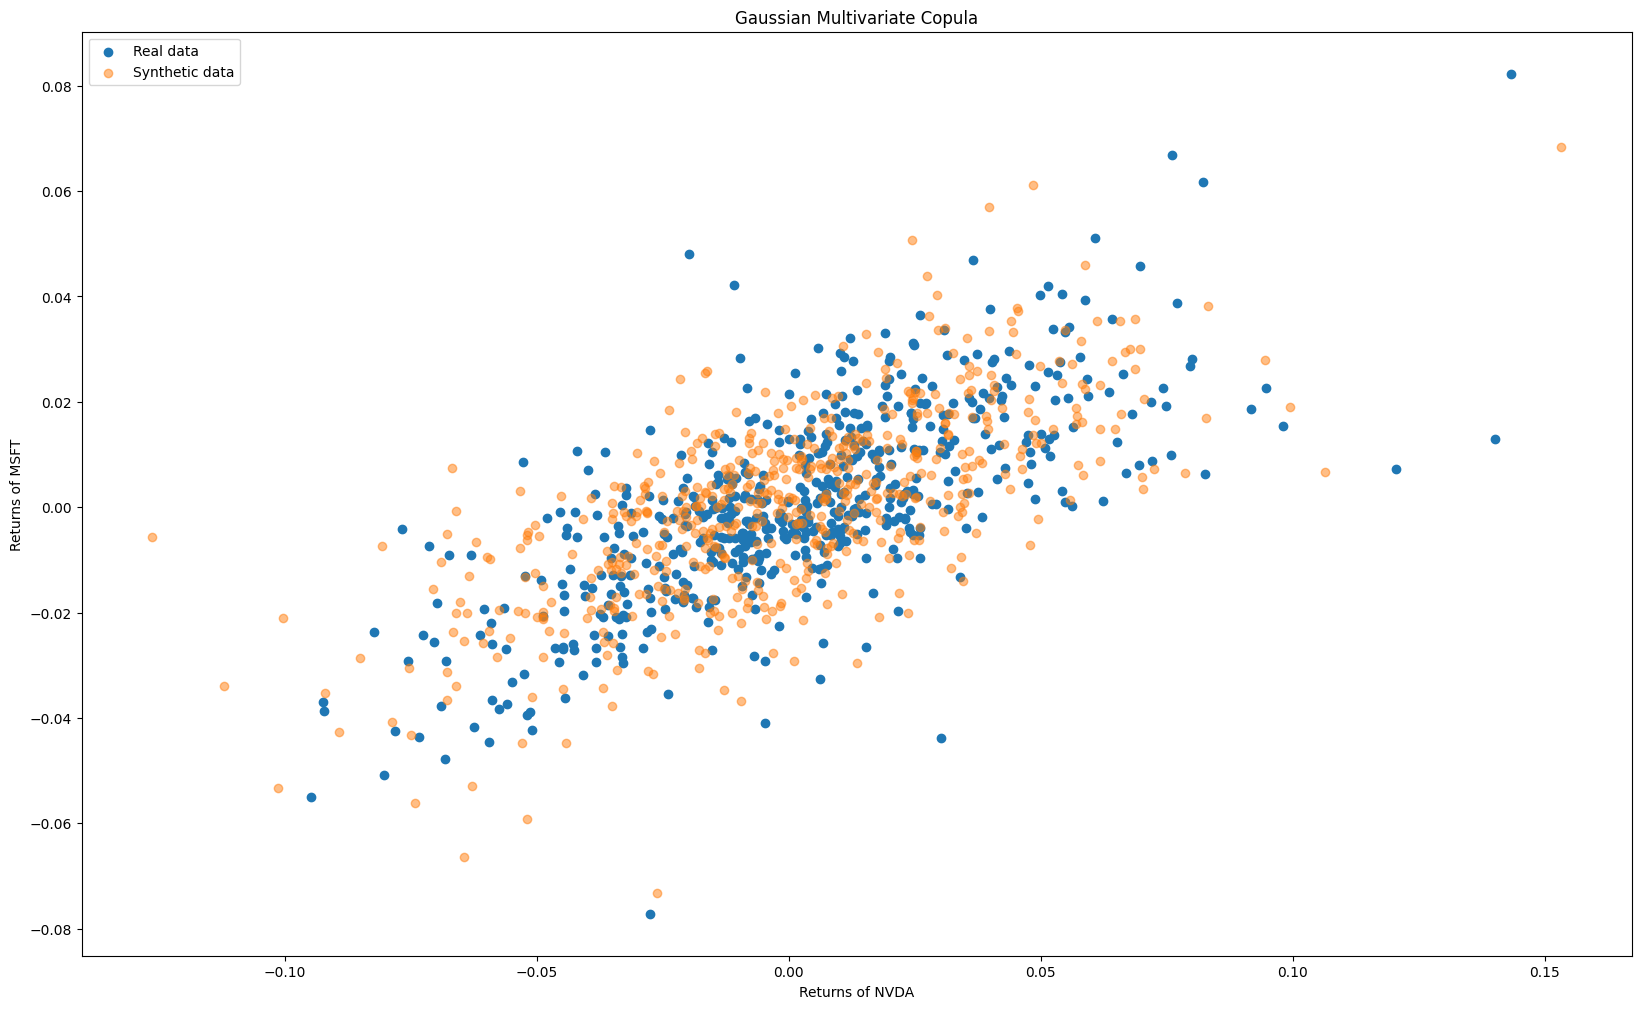

In [61]:
# copulas on returns
copula = GaussianMultivariate()
copula.fit(returns)

# Generate synthetic samples from the model
samples = copula.sample(len(returns))

# Visualize the real and synthetic data for a pair of assets
asset1 = 'NVDA'
asset2 = 'MSFT'

plt.figure(figsize=(20, 12))
plt.scatter(returns[asset1], returns[asset2], label='Real data')
plt.scatter(samples[asset1], samples[asset2], label='Synthetic data', alpha=0.5)
plt.xlabel(f'Returns of {asset1}')
plt.ylabel(f'Returns of {asset2}')
plt.legend()
plt.title('Gaussian Multivariate Copula')
plt.show()

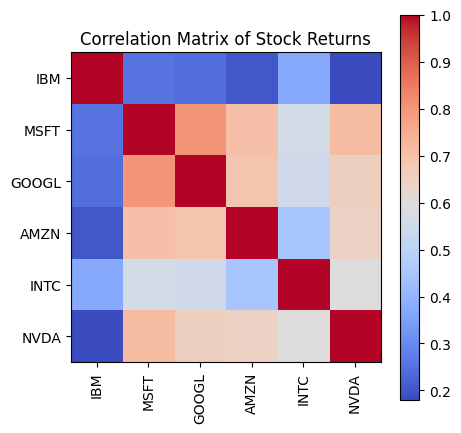

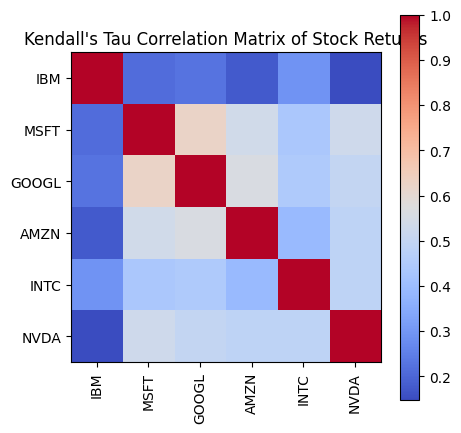

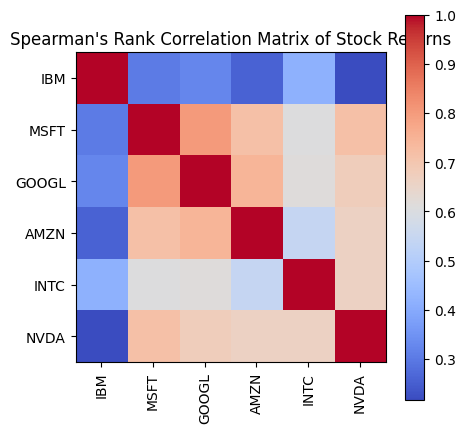

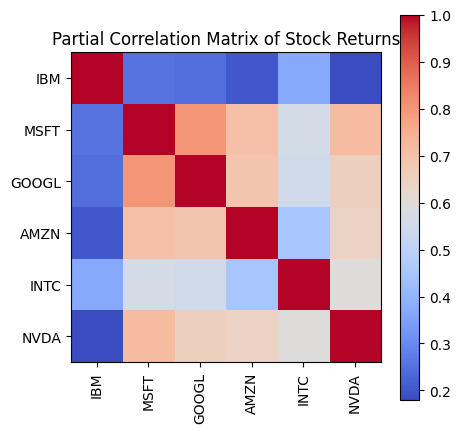

In [56]:
## plot the copula
# Compute the correlation matrix
correlation_matrix = returns.corr()

# Plot the correlation matrix
plt.figure(figsize=(5, 5))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix of Stock Returns')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# Compute the Kendall's tau correlation matrix
kendall_tau = returns.corr(method='kendall')

# Plot the Kendall's tau correlation matrix
plt.figure(figsize=(5, 5))
plt.imshow(kendall_tau, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Kendall's Tau Correlation Matrix of Stock Returns")
plt.xticks(range(len(kendall_tau.columns)), kendall_tau.columns, rotation='vertical')
plt.yticks(range(len(kendall_tau.columns)), kendall_tau.columns)
plt.show()

# Compute the Spearman's rank correlation matrix
spearman_rank = returns.corr(method='spearman')

# Plot the Spearman's rank correlation matrix
plt.figure(figsize=(5, 5))
plt.imshow(spearman_rank, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Spearman's Rank Correlation Matrix of Stock Returns")
plt.xticks(range(len(spearman_rank.columns)), spearman_rank.columns, rotation='vertical')
plt.yticks(range(len(spearman_rank.columns)), spearman_rank.columns)
plt.show()

# Compute the partial correlation matrix
partial_corr = returns.corr(method='pearson')

# Plot the partial correlation matrix
plt.figure(figsize=(5, 5))
plt.imshow(partial_corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Partial Correlation Matrix of Stock Returns')
plt.xticks(range(len(partial_corr.columns)), partial_corr.columns, rotation='vertical')
plt.yticks(range(len(partial_corr.columns)), partial_corr.columns)
plt.show()

